# Example of DC1394.jl

### \# Prepairing DC1394 package

In [1]:
using DC1394

### \# Prepairing other packages

In [2]:
using Images,ColorTypes,FixedPointNumbers
using ImageMagick


### \# getting a list of connected camera IDs.

In [3]:
ids=camera_enumerate()

1-element Array{DC1394.CameraId,1}:
 DC1394.CameraId(0x0000,0x00b09d0100908520)

## \# Connect to a camera.

In [4]:
c=Camera(ids[1])

CameraInfo:
	guid:	49712223531074848
	unit:	0
	unit_spec_ID:	41005
	unit_sw_version:	258
	unit_sub_sw_version:	16
	command_registers_base:	15728640
	unit_directory:	1064
	unit_dependent_directory:	1088
	advanced_features_csr:	15732736
	PIO_control_csr:	15733232
	SIO_control_csr:	15736832
	strobe_control_csr:	15733504
	format7_csr:	(0x0000000000000000,0x0000000000000000,0x0000000000000000,0x0000000000000000,0x0000000000000000,0x0000000000000000,0x0000000000000000,0x0000000000000000)
	iidc_version:	IIDC_VERSION_1_31
	vendor:	Point Grey Research
	model:	Chameleon CMLN-13S2C
	vendor_id:	45213
	model_id:	1
	bmode_capable:	TRUE
	one_shot_capable:	TRUE
	multi_shot_capable:	TRUE
	can_switch_on_off:	TRUE
	has_vmode_error_status:	TRUE
	has_feature_error_status:	FALSE
	max_mem_channel:	2
	flags:	0


## # get feature (shutter)

In [5]:
shutter=get_shutter(c)

199

##  #set feature

In [6]:
set_shutter(c,100)

SUCCESS::DC1394.Error

## #start transmission

In [7]:
set_transmission(c,DC1394.ON)

SUCCESS::DC1394.Error

## #setup capture

In [8]:
capture_setup(c)

SUCCESS::DC1394.Error

## #get video frame from capture queue

In [9]:
vf=capture_dequeue(c)

DC1394.dc1394video_frame_t(Ptr{UInt8} @0x0000000305062000,(0x00000500,0x000003c0),(0x00000000,0x00000000),COLOR_CODING_MONO8::DC1394.ColorCoding,::DC1394.ColorFilter,BYTE_ORDER_UYVY::DC1394.ByteOrder,0x00000008,0x00000500,VIDEO_MODE_1280x960_MONO8::DC1394.VideoMode,0x000000000012c000,0x0012c000,0x00000000,0x00000a00,0x000001e0,0x00052b4ac15b1900,0x00000000,Ptr{DC1394.CameraInfo} @0x00007fe63c657000,0x00000000,0x000000010842cb90,FALSE::DC1394.Bool,FALSE::DC1394.Bool)

## #convert video frame to Array{UInt8,2}

In [14]:
arr=Array(vf)

1280x960 Array{UInt8,2}:
 0x5e  0x58  0x60  0x55  0x61  0x59  …  0x88  0x73  0x8a  0x78  0x87  0x77
 0x51  0x62  0x54  0x61  0x58  0x62     0x82  0x8a  0x7c  0x8b  0x81  0x8a
 0x61  0x59  0x64  0x59  0x63  0x58     0x88  0x72  0x8d  0x77  0x8b  0x7b
 0x4f  0x5e  0x56  0x5e  0x59  0x64     0x7a  0x8f  0x85  0x89  0x80  0x8c
 0x60  0x54  0x62  0x5a  0x64  0x58     0x8a  0x75  0x87  0x76  0x87  0x7a
 0x5b  0x62  0x5d  0x62  0x5c  0x63  …  0x7f  0x8d  0x82  0x88  0x81  0x8d
 0x60  0x58  0x60  0x5b  0x62  0x5c     0x88  0x7a  0x8a  0x7b  0x8c  0x7b
 0x59  0x5f  0x54  0x60  0x5c  0x61     0x86  0x8d  0x83  0x8c  0x80  0x90
 0x60  0x5a  0x5f  0x58  0x62  0x5c     0x88  0x80  0x88  0x7a  0x8f  0x76
 0x58  0x62  0x5c  0x61  0x5d  0x63     0x7c  0x89  0x86  0x8d  0x7f  0x90
 0x60  0x5a  0x64  0x5b  0x66  0x57  …  0x87  0x78  0x8d  0x79  0x8e  0x7c
 0x58  0x64  0x5b  0x60  0x56  0x64     0x7d  0x89  0x7b  0x89  0x85  0x8e
 0x60  0x59  0x62  0x58  0x62  0x5d     0x87  0x7b  0x8a  0x7b  0x86  0x77


## #convert Array to Image (Images.jl)

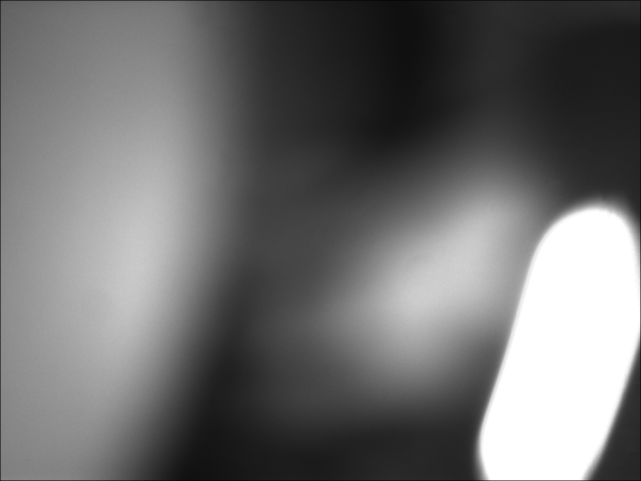

In [10]:
im=grayim(arr)

## #return video frame to the capture queue

In [15]:
capture_enqueue(vf)

SUCCESS::DC1394.Error